# Data exploration

In [1]:
# ignore warning for clear output
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/myrealfood/train.csv')
train_df

/home/ak/Desktop/myreadfood


,id,category,is_liquid,nutritional_saturated_fat_100g,nutritional_carbohydrates_100g,nutritional_fat_100g,nutritional_sugars_100g,nutritional_proteins_100g,nutritional_fiber_100g,nutritional_energy_100g,nutritional_salt_100g,ingredients_ordered,target
0,765866d8167564278da2cf67aac203af,Vegano y vegetariano,0,1.9,NaN,16.8,0.8,16.7,4.3,272.0,1.41,"['gR05M7hdHDnkxI1EY0jB', 'SsJ4xBTSIBSpMwWeQFSC...",1
1,819227b8191615cea03aaf6763099b85,Panes,0,0.9,51.0,4.7,7.4,8.9,3.2,291.0,1.40,"['nJsnpHiBOUfvj5itad3B', 'cSoODVpMKhGnpTL6xxSn...",1
2,3ab004c9bf842cc6f87368e1daada35c,Verduras y hortalizas,0,0.0,1.0,0.0,0.0,0.7,1.2,9.0,0.80,"['0QGKoQHlkIBm6SlHSILI', 'cSoODVpMKhGnpTL6xxSn...",0
3,c31ebe68689adeac9900e94cc96199bc,Panes,0,0.6,49.0,3.6,3.2,9.2,5.5,276.0,0.98,"['nJsnpHiBOUfvj5itad3B', 'cSoODVpMKhGnpTL6xxSn...",1
4,334ee09448335590a3898d28476f1195,"Arroz, pasta y otros cereales",0,0.0,79.0,1.0,0.0,5.1,0.0,352.0,0.00,['Erwdjd3OtzRMjlHmEHdG'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11995,484083a26b3caf7f46973f39216e29bf,Yogures,0,5.0,14.4,7.7,14.1,2.9,0.0,39.0,0.10,"['sG2ApLdn0OnEW3OaCMys', 'c66gvYfTTXDE8EHOKVVG...",1
11996,58c1751cf8f58b8bc7f8e5848f1fed09,Conservas,0,3.5,0.2,16.0,0.0,1.3,3.1,156.0,2.60,"['cSoODVpMKhGnpTL6xxSn', 'ViRR41yHpkGvT0tdwY2V...",0
11997,e14f8b98e98f9c93a3d3592bb151523a,Carne,0,2.3,1.5,6.5,1.3,17.5,0.0,135.0,2.20,"['UODOEihlSRK2ZXbuS1Fy', 'QxZ6L3czM1HUAggHzU3Q...",1
11998,3f1631b0e1807a8e916727d0f9367c09,Quesos,0,6.8,3.5,10.0,3.5,11.0,0.0,153.0,2.50,"['7dTKaDhQYCelTZY0ly0n', 'EInFvJ1B8OAw3MPdoPdy...",1


In [4]:
train_df['target'].value_counts()
# The dataset is unbalanced
# There are 2 classes, Therefore I can use firstly logistic regression but I am going to train various models for I can evaluate them

1    7218
0    4782
Name: target, dtype: int64

In [5]:
train_df.info()
# we have to convert object type to int or float for train model

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12000 non-null  object 
 1   category                        12000 non-null  object 
 2   is_liquid                       12000 non-null  int64  
 3   nutritional_saturated_fat_100g  11662 non-null  float64
 4   nutritional_carbohydrates_100g  11443 non-null  float64
 5   nutritional_fat_100g            11866 non-null  float64
 6   nutritional_sugars_100g         11680 non-null  float64
 7   nutritional_proteins_100g       11717 non-null  float64
 8   nutritional_fiber_100g          11590 non-null  float64
 9   nutritional_energy_100g         11659 non-null  float64
 10  nutritional_salt_100g           11492 non-null  float64
 11  ingredients_ordered             12000 non-null  object 
 12  target                          

In [6]:
train_df['id'].value_counts()
# checked if there are duplicated person bbut there are not

765866d8167564278da2cf67aac203af    1
18a1e673c8236bf193f5fd367352b24a    1
cf6ac97836b67337ca0ed41de1021b1d    1
bad45d891077b066369e8444d8a3273a    1
2bcb31762fdd0f8479ebbae3ac83e17d    1
                                   ..
8ba96ecae0ec5564667d0c585dc82e6c    1
62c656454cd575653cb8ecc7b8e9b259    1
048f657cac193bac0ebeb6a070e5a374    1
17f27e0a23735e21fae57a83b1081130    1
d27dc645037fa7e7cec6e13085704db5    1
Name: id, Length: 12000, dtype: int64

In [7]:
train_df.isnull().any()
# checked null values in dataset.
# Null values are mostly on float columns. Therefore I can calculate each column average and fill null values with average values

id                                False
category                          False
is_liquid                         False
nutritional_saturated_fat_100g     True
nutritional_carbohydrates_100g     True
nutritional_fat_100g               True
nutritional_sugars_100g            True
nutritional_proteins_100g          True
nutritional_fiber_100g             True
nutritional_energy_100g            True
nutritional_salt_100g              True
ingredients_ordered               False
target                            False
dtype: bool

In [8]:
# calcuate how many null values that we have in dataset
train_df.isnull().sum()
# there are lot of null values. Let's check how many item have each column

id                                  0
category                            0
is_liquid                           0
nutritional_saturated_fat_100g    338
nutritional_carbohydrates_100g    557
nutritional_fat_100g              134
nutritional_sugars_100g           320
nutritional_proteins_100g         283
nutritional_fiber_100g            410
nutritional_energy_100g           341
nutritional_salt_100g             508
ingredients_ordered                 0
target                              0
dtype: int64

# Feature engineering

In [9]:
import ast

class PrepareDataset:
    def __init__(self, dataset, labelencoder):
        self.dataset = dataset
        self.le = labelencoder
    
    # convert string to list of string
    def string2list(self, datum):
        return ast.literal_eval(datum)
    
    def encode_list_of_string(self):
        # get unique items
        unique_ingredients = []
        for ingredients in self.dataset['ingredients_ordered']:
            for item in ingredients:
                if item not in unique_ingredients:
                    unique_ingredients.append(item)
        
        self.le.fit(unique_ingredients)
        encoded_ingredients = self.dataset['ingredients_ordered'].apply(lambda x:le.transform(x))
        self.dataset['encoded_ingredients_ordered'] = encoded_ingredients

    def prepare(self):
        # this is for train LSTM model but for now, I am going to train traditional models. It's here for show that I can do
        convert = lambda x: self.string2list(x)
        self.dataset['ingredients_ordered'] = self.dataset['ingredients_ordered'].apply(convert)

        # encode list of string values
        self.encode_list_of_string()

        # fill null values with average of column
        keys = self.dataset.isnull().sum().keys()
        vals = self.dataset.isnull().sum().values
        for i, value in enumerate(vals):
            if value > 0:
                self.dataset[keys[i]].fillna((self.dataset[keys[i]].mean()), inplace=True)
        
        # encode category
        self.dataset['category'] = self.le.fit_transform(self.dataset['category'])

        # drop columns which i wont use in train
        self.dataset = self.dataset.drop(['ingredients_ordered', 'id', 'encoded_ingredients_ordered'], axis=1)

        return self.dataset

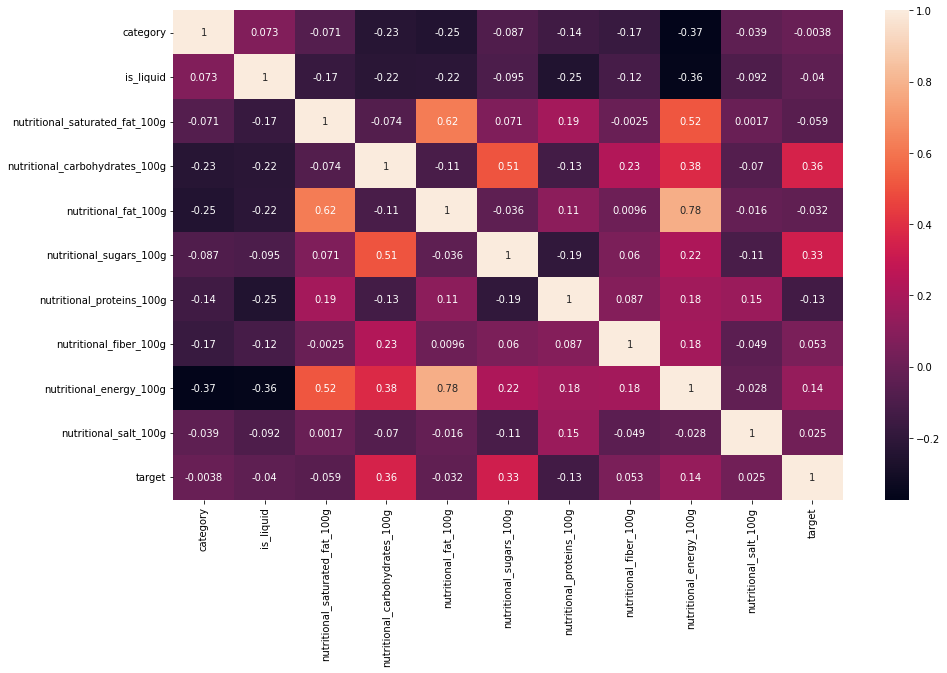

In [10]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# convert object data to float
le = LabelEncoder()

# prepare dataset
train_preparer = PrepareDataset(train_df, le)
train_df = train_preparer.prepare()

# visualize correlation
fig = plt.figure(figsize = (15, 9))
sns.heatmap(train_df.corr(), annot=True)

## Correlation shows that target related with nutritional_sugars_100gr and nutritional_carbohydrates_100gr. But the correlation score is not so good to tell it's totally related

# Train

In [11]:
# get features and labels
train_labels = train_df['target']
train_df = train_df.drop(['target'], axis=1)
train_features = train_df[train_df.columns.values]

In [11]:
# Before I checked targets and I released that the data is unbalanced. So I need to define weights for logistic regression model
# I will get percentage of classes and give weightes like that
tot = 7218+4782
for_1 = 7218/tot
for_0 = 4782/tot

print("for_1 ==> ", for_1)
print("for_0 ==> ", for_0)
# give weightes for unbalanced. Fine tune logistic regression
lg_weights = {0:for_1, 1:for_0}

for_1 ==>  0.6015
for_0 ==>  0.3985


In [12]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

class Trainer:
    def __init__(self, features, labels, lg_ft) -> None:
        self.features = features
        self.labels = labels
        self.lg_ft = lg_ft
        self.svm = SVC(kernel='linear', gamma='auto')
        self.log_reg = LogisticRegression(random_state=0, class_weight=self.lg_ft)
        self.gaussian = GaussianNB()
        self.knn = KNeighborsClassifier(n_neighbors=3)
        self.randon_forest = RandomForestClassifier()
    
    def train_models(self):
        log_reg_model = self.log_reg.fit(self.features, self.labels)
        print("LogisticRegression model trained")
        gaussian_model = self.gaussian.fit(self.features, self.labels)
        print("GaussianNB model trained")
        knn_model = self.knn.fit(self.features, self.labels)
        print("KNeighborsClassifier model trained")
        random_forest_model = self.randon_forest.fit(self.features, self.labels)
        print("RandomForestClassifier model trained")
        svm_model = self.svm.fit(self.features, self.labels)
        print("SVM model trained")

        return svm_model, log_reg_model, gaussian_model, knn_model, random_forest_model

In [13]:
trainer = Trainer(features=train_features, labels=train_labels, lg_ft=lg_weights)
models = trainer.train_models()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression model trained
GaussianNB model trained
KNeighborsClassifier model trained
RandomForestClassifier model trained
SVM model trained


# Evaluate

In [14]:
# Evaluate models with training dataset
for model in models:
    test_acc = model.score(train_features, train_labels)
    print(f"{str(round(test_acc * 100,2))}% train accuracy ===> {str(model)}")

70.53% train accuracy ===> SVC(gamma='auto', kernel='linear')
70.91% train accuracy ===> LogisticRegression(class_weight={0: 0.6015, 1: 0.3985}, random_state=0)
67.12% train accuracy ===> GaussianNB()
92.66% train accuracy ===> KNeighborsClassifier(n_neighbors=3)
99.77% train accuracy ===> RandomForestClassifier()


In [35]:
# preprocess for test data
test_df = pd.read_csv('/content/drive/MyDrive/myrealfood/test.csv')
test_preparer = PrepareDataset(test_df, le)
test_df = test_preparer.prepare()
test_df.head()

,category,is_liquid,nutritional_saturated_fat_100g,nutritional_carbohydrates_100g,nutritional_fat_100g,nutritional_sugars_100g,nutritional_proteins_100g,nutritional_fiber_100g,nutritional_energy_100g,nutritional_salt_100g,target
0,39,0,2.0,4.000000,3.0,4.0,3.3,0.0,246.0,1.268215,0
1,33,0,19.4,0.980000,27.0,0.1,19.4,0.0,325.0,1.268215,0
2,14,0,0.0,15.000000,0.1,12.5,0.3,0.7,62.0,0.010000,1
3,10,0,3.0,25.587791,8.0,1.0,40.0,0.0,236.0,4.500000,0
4,35,0,0.4,6.000000,3.1,6.0,1.1,1.3,59.0,1.000000,1


In [36]:
# get test features and labels
test_labels = test_df['target']
test_df = test_df.drop(['target'], axis=1)
test_features = test_df[test_df.columns.values]

In [20]:
# Evaluate model with acc based on test set
for model in models:
    test_acc = model.score(test_features, test_labels)
    print(f"{str(round(test_acc * 100,2))}% test accuracy ===> {str(model)}")

71.27% test accuracy ===> SVC(gamma='auto', kernel='linear')
71.6% test accuracy ===> LogisticRegression(class_weight={0: 0.6015, 1: 0.3985}, random_state=0)
68.23% test accuracy ===> GaussianNB()
86.5% test accuracy ===> KNeighborsClassifier(n_neighbors=3)
90.4% test accuracy ===> RandomForestClassifier()


## For now random forest is good looking but lets check on cross validation too

In [19]:
# Evaluate models on test dataset with cross validation
from sklearn.model_selection import cross_val_score

for model in models:
    print(f"{str(model)} is evaluating..")
    print(cross_val_score(model, test_features, test_labels))

SVC(gamma='auto', kernel='linear') is evaluating..
[0.68166667 0.74166667 0.73166667 0.71333333 0.71166667]
LogisticRegression(class_weight={0: 0.6015, 1: 0.3985}, random_state=0) is evaluating..
[0.675      0.71333333 0.71       0.70166667 0.72666667]
GaussianNB() is evaluating..
[0.66       0.72333333 0.665      0.70833333 0.715     ]
KNeighborsClassifier(n_neighbors=3) is evaluating..
[0.82       0.825      0.81166667 0.79666667 0.82666667]
RandomForestClassifier() is evaluating..
[0.88666667 0.89166667 0.87833333 0.85833333 0.865     ]


## Random forest is really looking good but let's check on each single prediction

In [44]:
# predict one by one for visualize prediction perform
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

predictions = []
for model in models:
    current_pred = {
        "model_name": str(model),
        "predictions": []
    }
    print(current_pred['model_name'])
    for index in range(len(test_features)):
        feature = test_features.iloc[index].values
        current_pred["predictions"].append(model.predict([feature])[0])
        
    predictions.append(current_pred)

SVC(gamma='auto', kernel='linear')
LogisticRegression(class_weight={0: 0.6015, 1: 0.3985}, random_state=0)
GaussianNB()
KNeighborsClassifier(n_neighbors=3)
RandomForestClassifier()


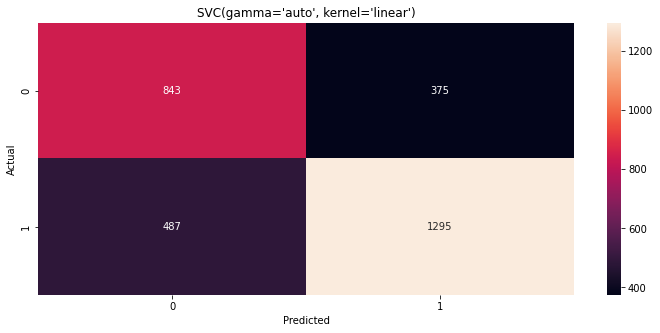

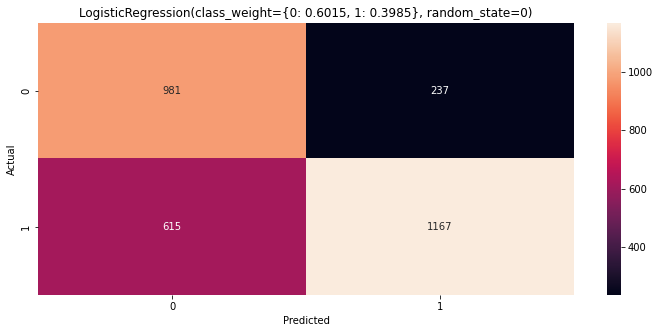

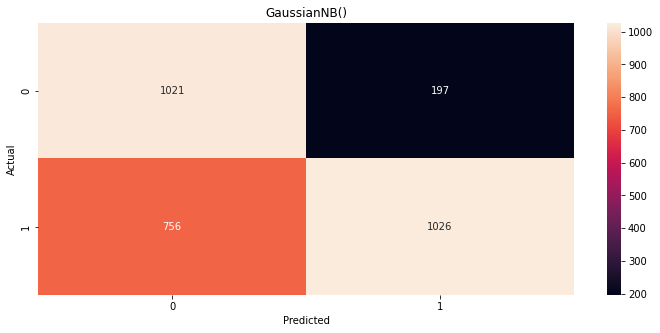

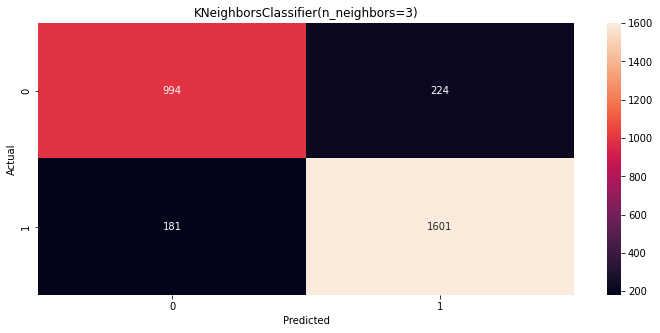

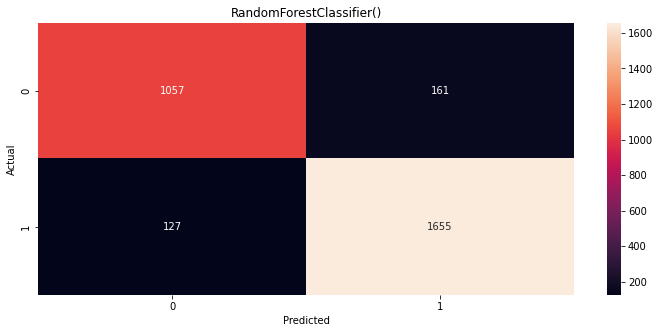

In [48]:
for pred in predictions:
    conf_mat = confusion_matrix(test_labels, pred['predictions'])
    fig, ax = plt.subplots(figsize=(12,5))
    sns.heatmap(conf_mat, annot=True, fmt='d')
    plt.title(pred['model_name'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

In [50]:
for pred in predictions:
    print(pred['model_name'])
    print(classification_report(test_labels, pred['predictions']))
    print('\n')

SVC(gamma='auto', kernel='linear')
              precision    recall  f1-score   support

           0       0.63      0.69      0.66      1218
           1       0.78      0.73      0.75      1782

    accuracy                           0.71      3000
   macro avg       0.70      0.71      0.71      3000
weighted avg       0.72      0.71      0.71      3000



LogisticRegression(class_weight={0: 0.6015, 1: 0.3985}, random_state=0)
              precision    recall  f1-score   support

           0       0.61      0.81      0.70      1218
           1       0.83      0.65      0.73      1782

    accuracy                           0.72      3000
   macro avg       0.72      0.73      0.71      3000
weighted avg       0.74      0.72      0.72      3000



GaussianNB()
              precision    recall  f1-score   support

           0       0.57      0.84      0.68      1218
           1       0.84      0.58      0.68      1782

    accuracy                           0.68      3000
   m

## From these visualizations, I can understand that Random forest and KNeighbors have good score. But if we will select one, we have to make a balance between model accuracy and model size too. SMALL MODEL SIZE AND HIGH ACC IS THE BEST

In [56]:
import pickle
random_forest = "/content/drive/MyDrive/myrealfood/models/random_forest.pkl"
KN = "/content/drive/MyDrive/myrealfood/models/kn.pkl"
pickle.dump(model[3], open(KN, 'wb'))
pickle.dump(model[4], open(random_forest, 'wb'))

## When I save the models are looking like so similar. Random forest 152kb, KN 161 kb. Math is math even for small differences. Therefore, I choose random forest

# improve little bit more random forest

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv 
from sklearn.model_selection import HalvingGridSearchCV

param_grid = {'max_depth': [3, 5, 10],
              'min_samples_split': [2, 5, 10]}
base_estimator = RandomForestClassifier()

sh = HalvingGridSearchCV(base_estimator, param_grid, cv=5,
                         factor=2, resource='n_estimators',
                         max_resources=30).fit(train_features, train_labels)
sh.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=24)

In [32]:
model = RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=24)
model.fit(train_features, train_labels)

RandomForestClassifier(max_depth=10, min_samples_split=5, n_estimators=24)

In [39]:
model.score(test_features, test_labels)

0.8823333333333333

In [41]:
pred = []
for i in range(len(test_features)):
    feature = test_features.iloc[i].values
    pred.append(model.predict([feature])[0])

In [44]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1218
           1       0.89      0.91      0.90      1782

    accuracy                           0.88      3000
   macro avg       0.88      0.88      0.88      3000
weighted avg       0.88      0.88      0.88      3000



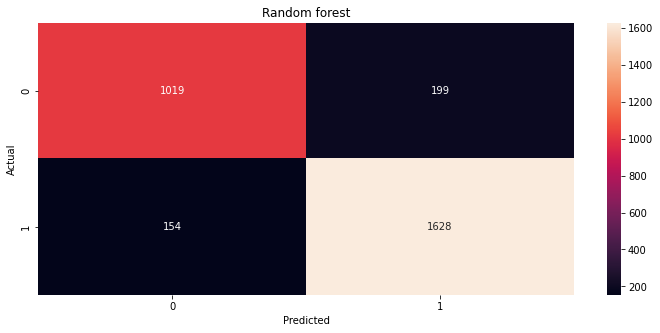

In [46]:
conf_mat = confusion_matrix(test_labels, pred)
fig, ax = plt.subplots(figsize=(12,5))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.title('Random forest')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## Tried to improve little bit more model but that time model default parameter was better. Therefore First Random forest model choosen. Not the second one